In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install tokenizers

In [ ]:
!mkdir 'data'

In [ ]:
!tar -xzvf '/content/drive/MyDrive/for_atom/aclImdb_v1.tar.gz' -C '/content/data'

Выходные данные были обрезаны до нескольких последних строк (5000).
aclImdb/train/unsup/44983_0.txt
aclImdb/train/unsup/44982_0.txt
aclImdb/train/unsup/44981_0.txt
aclImdb/train/unsup/44980_0.txt
aclImdb/train/unsup/44979_0.txt
aclImdb/train/unsup/44978_0.txt
aclImdb/train/unsup/44977_0.txt
aclImdb/train/unsup/44976_0.txt
aclImdb/train/unsup/44975_0.txt
aclImdb/train/unsup/44974_0.txt
aclImdb/train/unsup/44973_0.txt
aclImdb/train/unsup/44972_0.txt
aclImdb/train/unsup/44971_0.txt
aclImdb/train/unsup/44970_0.txt
aclImdb/train/unsup/44969_0.txt
aclImdb/train/unsup/44968_0.txt
aclImdb/train/unsup/44967_0.txt
aclImdb/train/unsup/44966_0.txt
aclImdb/train/unsup/44965_0.txt
aclImdb/train/unsup/44964_0.txt
aclImdb/train/unsup/44963_0.txt
aclImdb/train/unsup/44962_0.txt
aclImdb/train/unsup/44961_0.txt
aclImdb/train/unsup/44960_0.txt
aclImdb/train/unsup/44959_0.txt
aclImdb/train/unsup/44958_0.txt
aclImdb/train/unsup/44957_0.txt
aclImdb/train/unsup/44956_0.txt
aclImdb/train/unsup/44955_0.txt
aclI

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GRU, LSTM, Input, Dropout,  Conv1D, MaxPooling1D
from tensorflow.keras import utils
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras import utils
from tensorflow.keras.regularizers import l1, l2
from sklearn.utils import shuffle
from tokenizers import Tokenizer
from tokenizers.models import BPE
from tokenizers.pre_tokenizers import Whitespace
from tokenizers.trainers import BpeTrainer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import os
import pandas as pd
data = {'review': [], 'rating': []}
def load_data(directory, data):
    for filename in os.listdir(directory):
        if filename.endswith(".txt"):
            rating = filename.split('_')[1].replace('.txt', '')
            path = os.path.join(directory, filename)
            with open(path, 'r', encoding='utf-8') as file:
                review = file.read()
            data['review'].append(review)
            data['rating'].append(rating)
    return pd.DataFrame(data)


In [ ]:
pd.DataFrame(data)

,review,rating
0,"A year or so ago, I was watching the TV news w...",9
1,What people fail to understand about this movi...,9
2,I have seen a lot of Saura films and always fo...,10
3,"""And the time came when the risk to remain tig...",8
4,"Bruce Almighty is the story of Bruce Nolan, an...",7
...,...,...
49995,and I for one think that is a good thing. I've...,9
49996,This movie is a picture perfect action/drama/a...,10
49997,This BRASS EYE special PAEDO-GEDDON was swampe...,7
49998,Cheers to all the wonderful fans of this film ...,10


In [ ]:
df = load_data('/content/data/aclImdb/train/pos', data)
df = load_data('/content/data/aclImdb/train/neg', data)
df = shuffle(df)
df = load_data('/content/data/aclImdb/test/neg', data)
df = load_data('/content/data/aclImdb/test/pos', data)
df = shuffle(df)


In [ ]:
df = pd.DataFrame(data)

In [ ]:
df.shape

(50000, 2)

In [ ]:
df['rating'] = df['rating'].astype(int)
df['rating'].unique()

array([6, 7, 5, 4, 0, 3, 1, 2])

In [ ]:
mapping = {1:0, 2:1, 3:2, 4:3, 7:4, 8:5, 9:6, 10:7}
df['rating'] = df['rating'].map(mapping)

In [ ]:
!pip install pymorphy2

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 54.5 MB/s eta 0:00:00
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13704 sha256=3cdc4c8ae7f067089357628dda332e54d1eb6f4fff2c8dccfc743c8a6d41035d
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


In [ ]:
import nltk
from nltk.corpus import stopwords
import re
import pymorphy2 as p2

nltk.download('stopwords')
nltk.download('punkt')

stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
  words = nltk.word_tokenize(text)
  filtered_words = [word for word in words if word.lower() not in stop_words and word.isalnum()]
  return " ".join(filtered_words)
df['filtered'] = df['review'].apply(remove_stopwords)

def remove_html(text):
  clean = re.compile('<.*?>|&.*?;')
  return re.sub(clean, '', text)

df['filtered'] = df['filtered'].apply(remove_html)

morth = p2.MorphAnalyzer()

def lematisation(array):
    array = array.split(' ')
    return [morth.parse(item)[0].normal_form for item in array]

df['filtered'] = df['filtered'].apply(lematisation)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
from sklearn.model_selection import train_test_split
# Предполагается, что df - это твой DataFrame, и он уже загружен
X_train, X_test, y_train, y_test = train_test_split(df['filtered'], df['rating'], test_size=0.2, random_state=42)


In [ ]:
max_len = 250  # Это может варьироваться в зависимости от данных

# Инициализируем токенизатор и тренер
tokenizer = Tokenizer(BPE())
tokenizer.pre_tokenizer = Whitespace()
trainer = BpeTrainer(special_tokens=["[UNK]", "[CLS]", "[SEP]", "[PAD]", "[MASK]"])
tokenizer.train_from_iterator(X_train.tolist(), trainer)

In [ ]:
max_words = 30000
max_review_len = 350

In [39]:
X_train = X_train.apply(lambda x: ' '.join(x))
X_test = X_test.apply(lambda x: ' '.join(x))

In [40]:
sequences_train = [tokenizer.encode(text).ids for text in X_train]

sequences_test = [tokenizer.encode(text).ids for text in X_test]

In [41]:
max_index = max(max(seq) for seq in sequences_train if len(seq) > 0)
print(f'Max index: {max_index}')

Max index: 29999


In [42]:
X_train = pad_sequences(sequences_train, maxlen=max_review_len)
X_test = pad_sequences(sequences_test, maxlen=max_review_len)
y_test = utils.to_categorical(y_test, 8)
y_train = utils.to_categorical(y_train, 8)

In [43]:
model = Sequential([
    Input(shape=(max_review_len,)),
    Embedding(input_dim=max_words, output_dim=100),
    Conv1D(64, 5, activation='relu'),
    MaxPooling1D(pool_size=4),
    LSTM(64, return_sequences=True, kernel_regularizer=l2(0.001)),
    LSTM(64, kernel_regularizer=l2(0.001)),
    Dense(8, activation='softmax')
])

model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [44]:
history = model.fit(X_train, y_train, batch_size=512, epochs=4, validation_split=0.1)

Epoch 1/4
71/71 ━━━━━━━━━━━━━━━━━━━━ 140s 2s/step - accuracy: 0.2227 - loss: 2.1438 - val_accuracy: 0.4010 - val_loss: 1.6270
Epoch 2/4
71/71 ━━━━━━━━━━━━━━━━━━━━ 134s 2s/step - accuracy: 0.4355 - loss: 1.5127 - val_accuracy: 0.4215 - val_loss: 1.5315
Epoch 3/4
71/71 ━━━━━━━━━━━━━━━━━━━━ 139s 2s/step - accuracy: 0.5212 - loss: 1.2608 - val_accuracy: 0.4302 - val_loss: 1.5612
Epoch 4/4
71/71 ━━━━━━━━━━━━━━━━━━━━ 143s 2s/step - accuracy: 0.5852 - loss: 1.0916 - val_accuracy: 0.4108 - val_loss: 1.6672


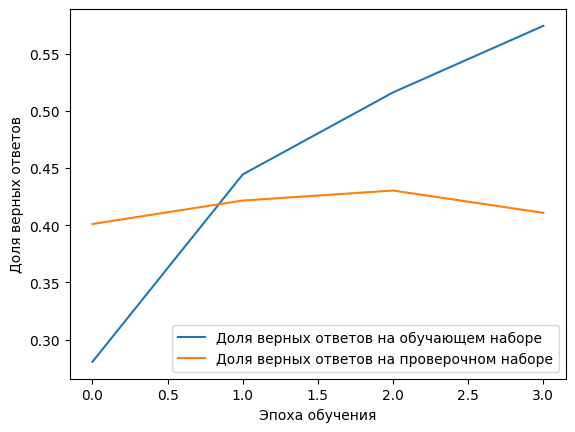

In [45]:
plt.plot(history.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [46]:
predictions = model.predict(X_test, verbose=1)
predicted_ratings = predictions.argmax(axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 47ms/step


In [51]:
score = model.evaluate(X_test, y_test, verbose=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 48ms/step - accuracy: 0.3994 - loss: 1.7184


In [59]:
print(f'Точность модели = {score[1] * 100:.2f}%')

Точность модели = 40.04%


In [60]:
model.save('Third_try.keras')